## 인공신경망 (Neural networtk)

In [4]:
##  Import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras

print(keras.__version__)

# 2.2.4-tf
# np.__version__

2.6.0


'1.23.0'

In [6]:
import platform
print(platform.python_version())

3.9.5


### Fashion MNIST data import

In [7]:

# Returns:
#     Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

print(train_input.shape)
print(train_target.shape)


print(test_input.shape)
print(test_target.shape)
# type(train_input)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Fashion_mnist 자료 확인

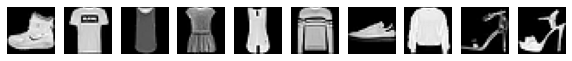

In [19]:
fig, axs = plt.subplots(1, 10, figsize = (10,10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap = "gray")
    axs[i].axis('off')
plt.show()


# fig, axs = plt.subplots(10, 10, figsize = (10, 10))

# for i in range(10):
#     for j in range(10):
#         axs[i, j].imshow(train_input[i*10 + j], cmap = 'gray')
#         axs[i, j].axis('off')
    
# plt.show()

In [20]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

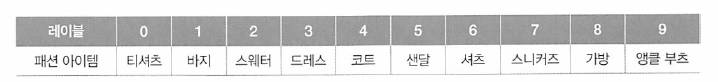

In [1]:
# from IPython.display import Image
# Image('../fig/fashion_mnist_label.png')

In [11]:
train_scaled = (train_input/255.0).reshape(-1, 28*28)
test_scaled = (test_input/255.0).reshape(-1, 28*28)

print(train_input.shape)
print(train_scaled.shape)

(60000, 28, 28)
(60000, 784)


In [6]:
# %config Completer.use_jedi = False

### Logistic regression with SDG and CV

In [42]:
## Logistic regression

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter=5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)

print(scores['test_score'])

[0.82908333 0.81941667 0.82075    0.80916667 0.818     ]


In [43]:
np.mean(scores['test_score'])

0.8192833333333333

In [22]:
## Split data into learning set and validation set
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size = 0.2, random_state = 42)

In [23]:
print(train_scaled.shape, val_scaled.shape)

(48000, 784) (12000, 784)


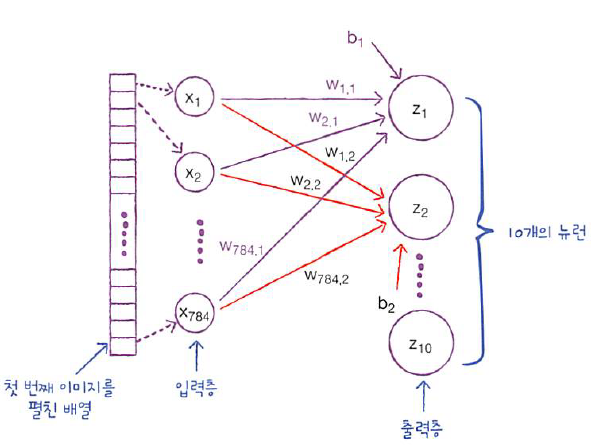

In [5]:
# from IPython.display import Image
# Image('../fig/hg_dense1.png')

### 단층 신경망 만들기

In [25]:
model = keras.Sequential(name = 'mymodel')
model.add(keras.layers.Dense(10, activation = 'softmax',
                            input_shape = (784, ), name = 'Hidden'))
model.summary()

# dense =  keras.layers.Dense(10, activation='softmax', 
#                             input_shape = (784, ))
# model = keras.Sequential(dense)
# model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


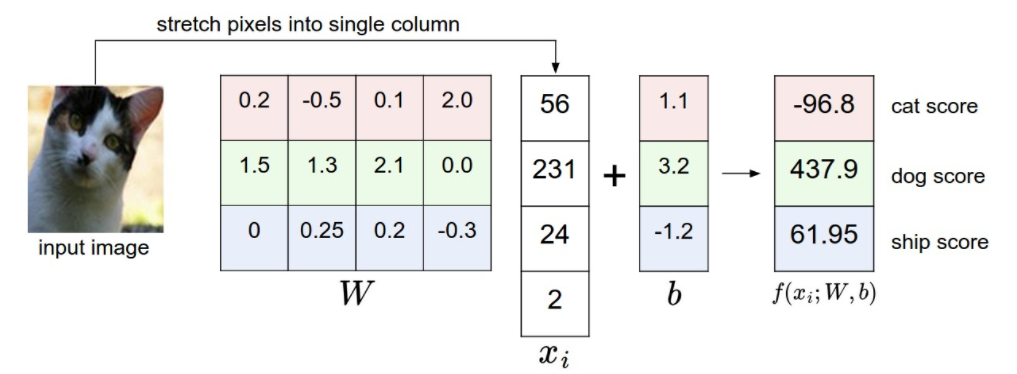

In [12]:
# from IPython.display import Image
# Image('../fig/DL_cnn_flow1.PNG')

In [27]:
# sparse_categorocal_crossentropy: 정수로된 타깃값을 one-hot encoding 변환없이 사용
# categorocal_crossentropy: target one-hot encoding에 사용

model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = 'accuracy')

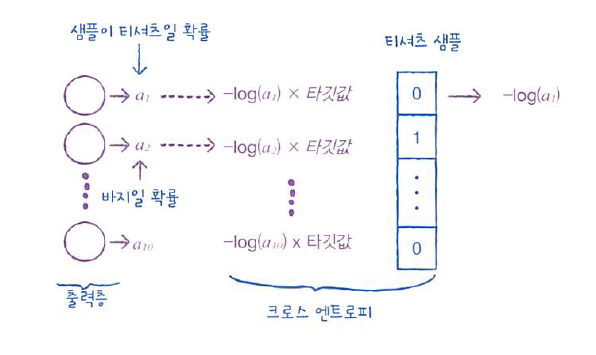

In [3]:
# from IPython.display import Image
# Image('../fig/DL_softmax.PNG')

In [28]:
model.fit(train_scaled, train_target, epochs = 5, batch_size = 100)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6063 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 1s 964us/step - loss: 0.4780 - accuracy: 0.8399
Epoch 3/5
1500/1500 [==============================] - 1s 974us/step - loss: 0.4566 - accuracy: 0.8478
Epoch 4/5
1500/1500 [==============================] - 1s 973us/step - loss: 0.4448 - accuracy: 0.8512
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8540


In [29]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 846us/step - loss: 0.4974 - accuracy: 0.8371


[0.49740472435951233, 0.8371000289916992]

## 심층 신경망, Deep learning

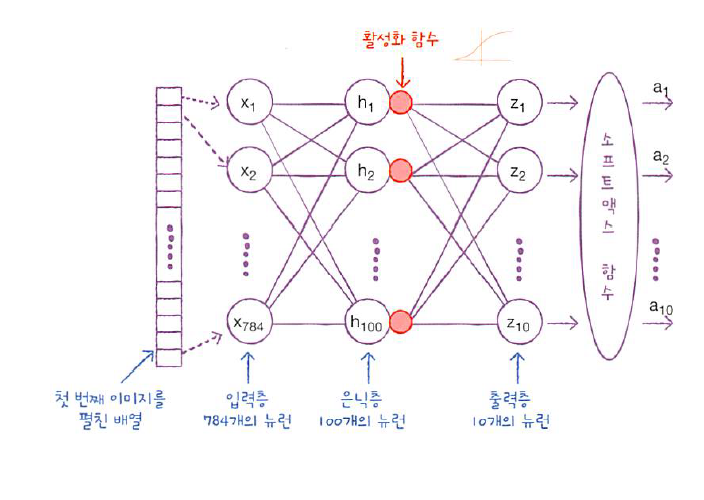

In [4]:
# from IPython.display import Image
# Image('../fig/DL_layers.PNG')

In [30]:
print(train_scaled.shape)
print(train_target.shape)

print(val_scaled.shape)

(48000, 784)
(48000,)
(12000, 784)


In [23]:
## Split data into learning set and validation set
# from sklearn.model_selection import train_test_split

# train_scaled = (train_input/255.0).reshape(-1, 28*28)

# train_scaled, val_scaled, train_target, val_target = train_test_split(
# train_scaled, train_target, test_size = 0.2, random_state = 42)

In [41]:
model = keras.Sequential(name = 'MNIST')
model.add(keras.layers.Dense(100, activation = 'sigmoid', 
                            input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [40]:
# dense1 =  keras.layers.Dense(100, activation='sigmoid',
#                             input_shape = (784,))
# dense2 = keras.layers.Dense(10, activation='softmax')

# model = keras.Sequential([dense1, dense2])

In [42]:
model.summary()

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', 
                       input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax',
                      name = 'output')
], name = '패션 MNIST 모델')

In [39]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


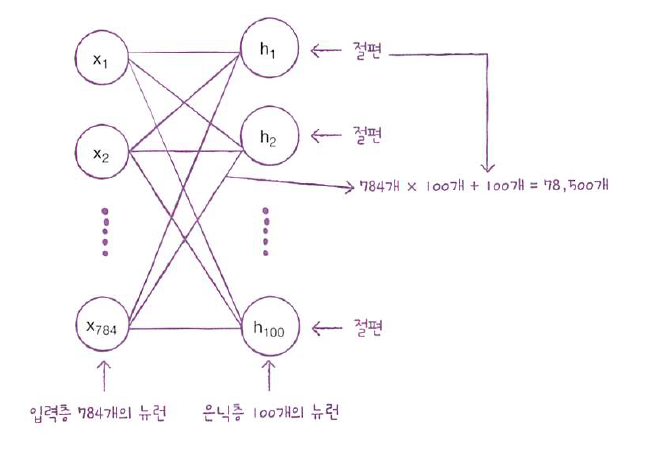

In [5]:
# from IPython.display import Image
# Image('../fig/DL_parameters.PNG')

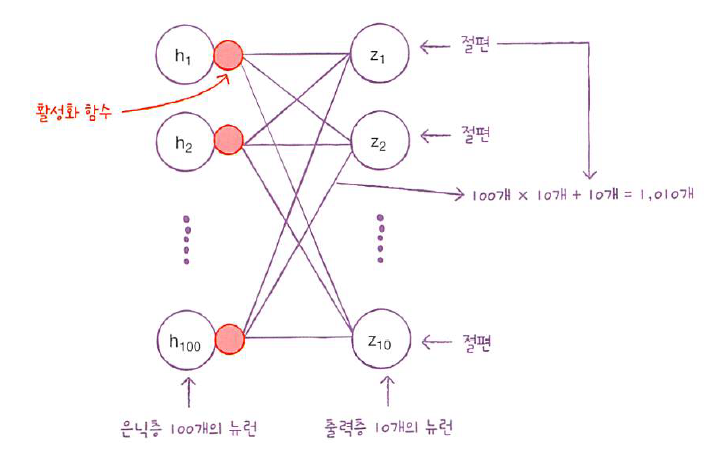

In [6]:
# from IPython.display import Image
# Image('../fig/DL_parameters_softmax.PNG')

In [36]:
train_target

array([7, 3, 5, ..., 6, 6, 1], dtype=uint8)

In [43]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4077 - accuracy: 0.8536
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8661
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3508 - accuracy: 0.8733
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8791


In [44]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8615


[0.38595786690711975, 0.8615000247955322]

In [45]:
## activation function 

model = keras.Sequential(name = 'Fashion_mnist')
model.add(keras.layers.Dense(100, input_shape = (784, ), 
                             activation='relu',
                             name = 'hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name = 'output'))

In [61]:
model.summary()

Model: "Fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
print(train_input.shape)

(60000, 28, 28)


In [50]:
model.compile(loss='sparse_categorical_crossentropy', metrics = "accuracy")
model.fit(train_scaled.reshape(-1, 28, 28), train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.8145
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3917 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8734: 0s - loss: 0
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8848


In [53]:
print(np.around(model.evaluate(val_scaled, val_target), 2))

375/375 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8767
[0.36 0.88]


In [54]:
# sgd = keras.optimizers.SGD(learning_rate=0.1)
# adagrad = keras.optimizers.Adagrad()
# rmsprop = keras.optimizers.RMSprop()

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3015 - accuracy: 0.8906
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2815 - accuracy: 0.8964
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2710 - accuracy: 0.8996
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2581 - accuracy: 0.9048
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2493 - accuracy: 0.9074


In [55]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8873


[0.3267507255077362, 0.887333333492279]

## 손실곡선 (loss curve)

In [9]:
## 함수 정의

def model_fn(a_layer=None, name = None):
    model = keras.Sequential(name = name)
    model.add(keras.layers.Flatten(input_shape = (784,)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [65]:
model = model_fn(name = 'my_model')
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose = 0)

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

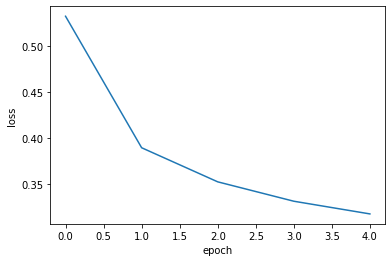

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
# plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 과적합 (Overfitting)

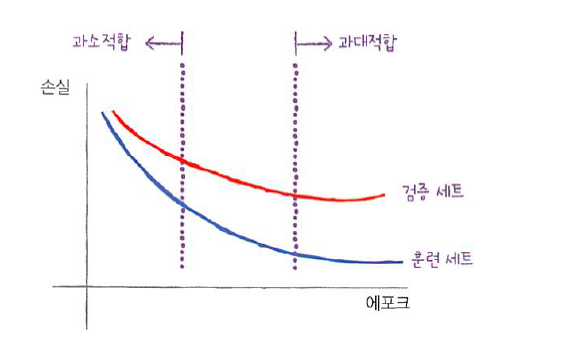

In [7]:
# from IPython.display import Image
# Image('../fig/DL_loss_curve.PNG')

In [69]:
model  = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = 'accuracy')
history  = model.fit(train_scaled, train_target,
                    epochs=40)

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5348 - accuracy: 0.8110
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8590
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3575 - accuracy: 0.8723
Epoch 4/40
1500/1500 [==============================] - ETA: 0s - loss: 0.3337 - accuracy: 0.88 - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8802
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8863: 0s - loss: 0.3171 - accuracy
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8885
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8930
Epoch 8/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.8975
Epoch 9/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8997
Epoch 10/4

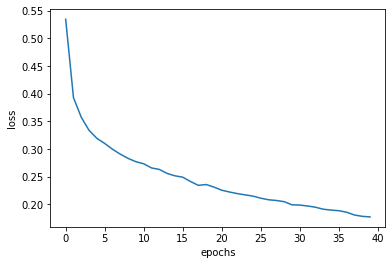

In [71]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [84]:
model  = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', 
             metrics = 'accuracy',
             optimizer = 'rmsprop')
print(train_scaled.shape)
history  = model.fit(train_scaled, train_target,
                    epochs=100, batch_size = 300,
                    val)

history  = model.fit(train_scaled, train_target,
                    epochs=100, batch_size = 300,
                    validation_split=0.3)

# history  = model.fit(train_scaled, train_target,
#                     epochs=100, batch_size = 300,
#                     validation_data = (val_scaled, val_target))

(48000, 784)
Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 0.7035 - accuracy: 0.7579 - val_loss: 0.5115 - val_accuracy: 0.8275
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4787 - accuracy: 0.8333 - val_loss: 0.4994 - val_accuracy: 0.8172
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.8483 - val_loss: 0.4515 - val_accuracy: 0.8344
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8603 - val_loss: 0.3941 - val_accuracy: 0.8582
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3696 - accuracy: 0.8668 - val_loss: 0.3711 - val_accuracy: 0.8672
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8747 - val_loss: 0.3535 - val_accuracy: 0.8738
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8777 - val_loss: 0.3619 - val_acc

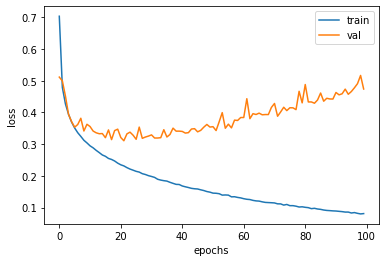

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 최적화 (Adam optimizer)

In [92]:
model  = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics = 'accuracy')
history  = model.fit(train_scaled, train_target,
                    epochs=50,
                    validation_data = (val_scaled, val_target))

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5316 - accuracy: 0.8157 - val_loss: 0.4657 - val_accuracy: 0.8307
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3997 - accuracy: 0.8563 - val_loss: 0.4182 - val_accuracy: 0.8494
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3581 - accuracy: 0.8711 - val_loss: 0.3762 - val_accuracy: 0.8641
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8790 - val_loss: 0.3368 - val_accuracy: 0.8782
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.8863 - val_loss: 0.3355 - val_accuracy: 0.8771
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8944 - val_loss: 0.3286 - val_accuracy: 0.8799
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8970 - val_loss: 0.3318 - val_accuracy:

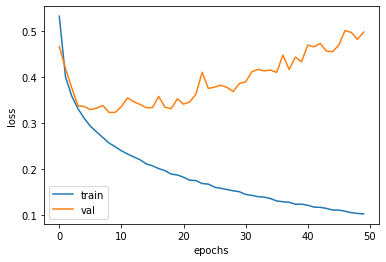

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

 ## 과적합 방지 (e.g., Dropout)

In [89]:
# from IPython.display import Image
# Image('../fig/DL_dropout.PNG')

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 50, 
                    verbose = 1, validation_split= 0.2)


Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4328 - accuracy: 0.8436 - val_loss: 0.3740 - val_accuracy: 0.8655
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3959 - accuracy: 0.8563 - val_loss: 0.3533 - val_accuracy: 0.8727
Epoch 3/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3774 - accuracy: 0.8614 - val_loss: 0.3447 - val_accuracy: 0.8779
Epoch 4/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3625 - accuracy: 0.8668 - val_loss: 0.3550 - val_accuracy: 0.8680
Epoch 5/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3503 - accuracy: 0.8728 - val_loss: 0.3336 - val_accuracy: 0.8792
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3392 - accuracy: 0.8745 - val_loss: 0.3295 - val_accuracy: 0.8828
Epoch 7/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3311 - accuracy: 0.8786 - val_loss: 0.3331 - val_a

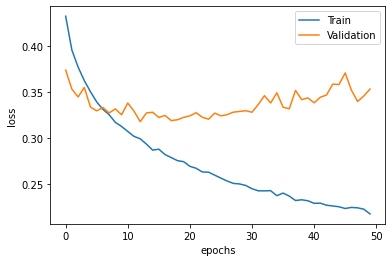

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()

## 학습이 완료된 모델 저장

In [33]:
## 학습 파라메터만 저장
model.save_weights('model_weights.h5')

## 학습 모델 전체 저장
model.save('model_whole.h5')

## 훈련된 Deep learning 파라메터 불러오기

In [41]:
del model

predict_val = model.predict(val_scaled)

NameError: name 'model' is not defined

In [44]:
# load_weights
# save_weights로 저장했던 모델과 새로 만든 모델이 정확히 같은 구조를 가져야 합니다.

model = model_fn(keras.layers.Dropout(0.3))
# model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

model.load_weights('model_weights.h5')


In [45]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.3860 - accuracy: 0.8834


[0.3860377073287964, 0.883400022983551]

## 새로운 데이터로 예측

In [51]:
# argmax: 배열에서 가장 큰 값을 가지는 인덱스를 반환
predict_val = model.predict(test_scaled)

val_labels = np.argmax(predict_val, axis = 1)

print(val_labels[:20])
print(test_target[:20])
print(np.mean(val_labels == test_target))

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
0.8834


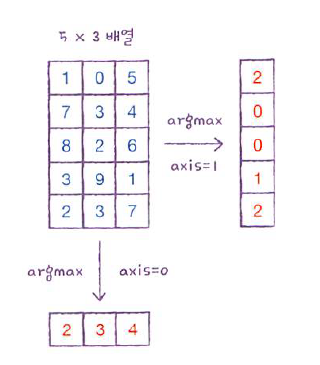

In [9]:
# from IPython.display import Image
# Image('../fig/np_argmax.PNG')

## 훈련된 Deep learning 모델 전체 불러오기

In [47]:
del model

model = keras.models.load_model('model_whole.h5')

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.3860 - accuracy: 0.8834


[0.3860377073287964, 0.883400022983551]

## Callback

In [117]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy',
             metrics= 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
model.fit(train_scaled, train_target, epochs = 20, 
         verbose = 1, validation_data = (val_scaled, val_target),
         callbacks=[checkpoint_cb])


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5890 - accuracy: 0.7930 - val_loss: 0.4135 - val_accuracy: 0.8519
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8411 - val_loss: 0.3773 - val_accuracy: 0.8612
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.8526 - val_loss: 0.3709 - val_accuracy: 0.8641
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3843 - accuracy: 0.8620 - val_loss: 0.3594 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8671 - val_loss: 0.3391 - val_accuracy: 0.8775
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8692 - val_loss: 0.3430 - val_accuracy: 0.8755
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3460 - accuracy: 0.8724 - val_loss: 0.3338 - val_accuracy:

## 최저 검증점수 부분에서 조기 종료

In [121]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy',
             metrics= 'accuracy')
# filename = '{epoch:02d}-{val_loss:.3f}.h5'
# checkpoint_cb = keras.callbacks.ModelCheckpoint(filename,
#                                                monitor='val_loss',
#                                                save_best_only=True,
#                                                mode='auto')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, 
         verbose = 1, validation_data = (val_scaled, val_target),
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5958 - accuracy: 0.7902 - val_loss: 0.4378 - val_accuracy: 0.8354
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8408 - val_loss: 0.3763 - val_accuracy: 0.8643
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4071 - accuracy: 0.8532 - val_loss: 0.3716 - val_accuracy: 0.8628
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3841 - accuracy: 0.8612 - val_loss: 0.3794 - val_accuracy: 0.8615
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3703 - accuracy: 0.8639 - val_loss: 0.3421 - val_accuracy: 0.8763
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8697 - val_loss: 0.3426 - val_accuracy: 0.8734
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3450 - accuracy: 0.8731 - val_loss: 0.3375 - val_accuracy:

In [122]:
print(early_stopping_cb.stopped_epoch)

13


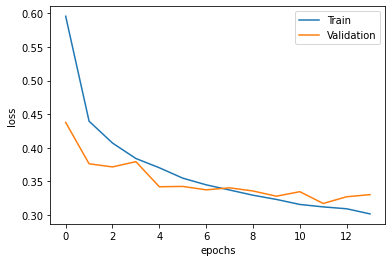

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [124]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8869


[0.31721004843711853, 0.8869166374206543]

# Convolutional neural network (CNN)

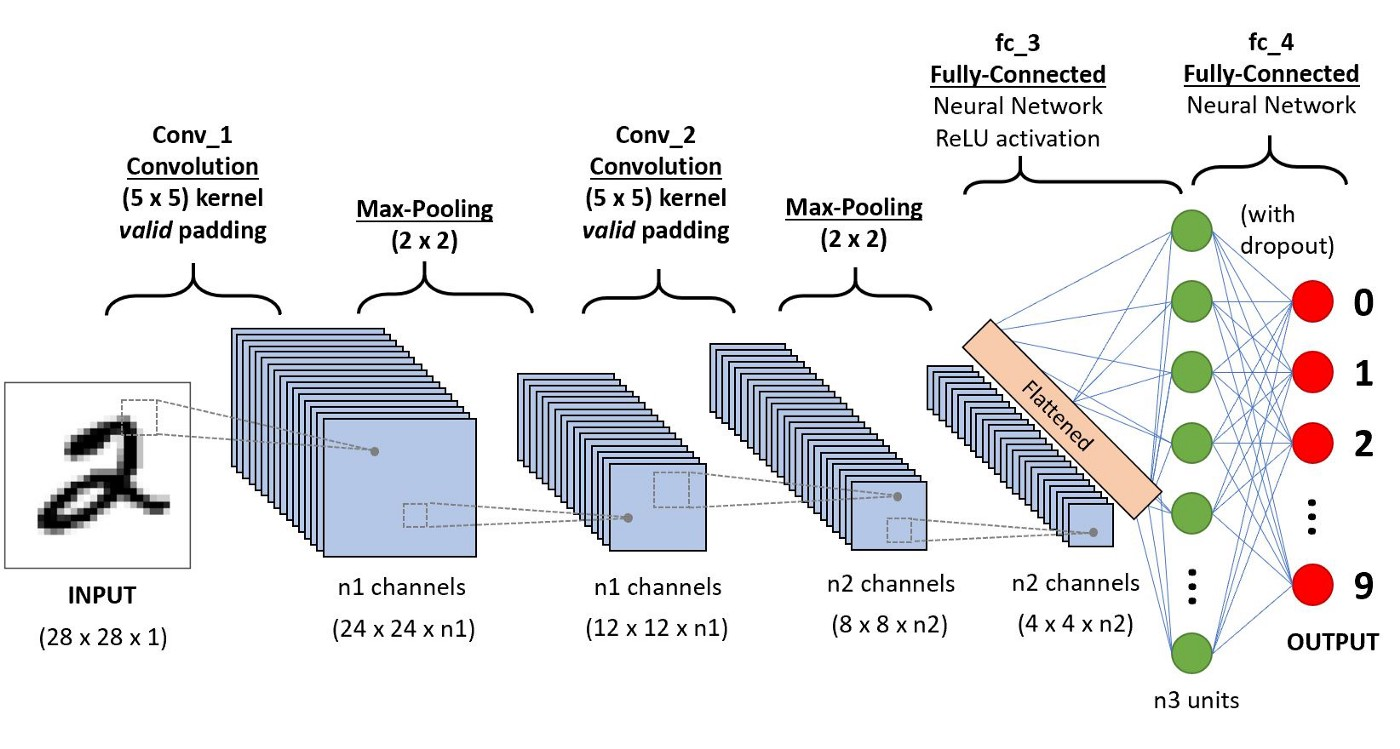

In [1]:
## Filter, Kernel, feature map, stride, padding, max_pooling
# https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# from IPython.display import Image
# Image('../fig/cnn_mnist_flow.png')

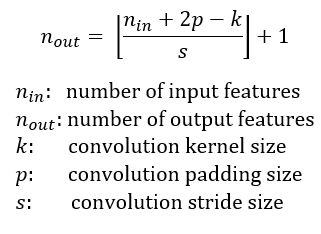

In [5]:
# https://seongkyun.github.io/study/2019/01/25/num_of_parameters/
#  

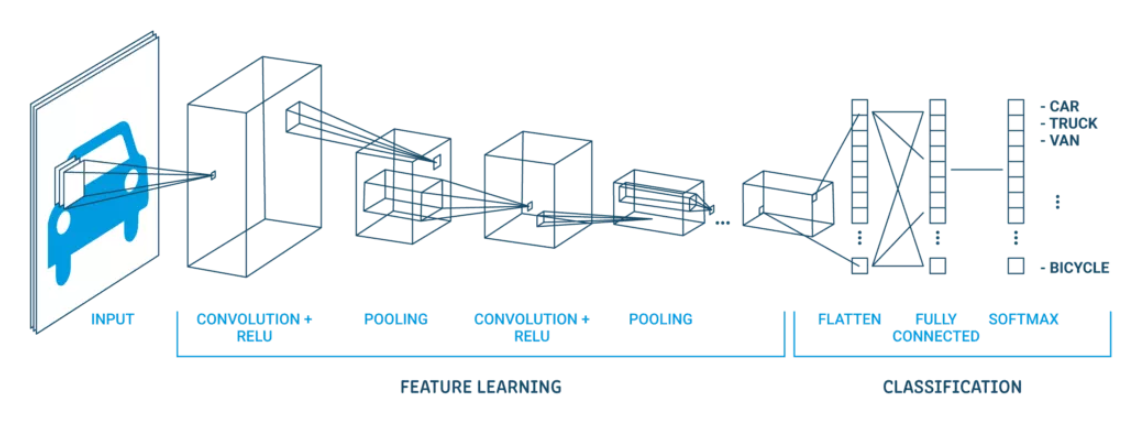

In [6]:
# https://www.run.ai/guides/deep-learning-for-computer-vision/deep-convolutional-neural-networks/
# from IPython.display import Image
# Image('../fig/cnn_3d_flow.png')

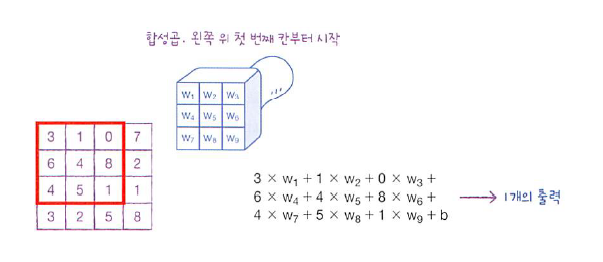

In [11]:
# from IPython.display import Image
# Image('../fig/hg_cnn_stamp.png')

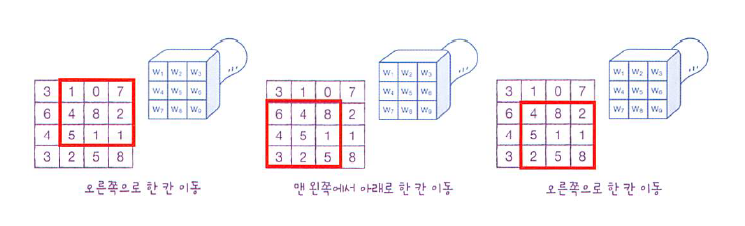

In [10]:
# from IPython.display import Image
# Image('../fig/hg_cnn_stride.png')

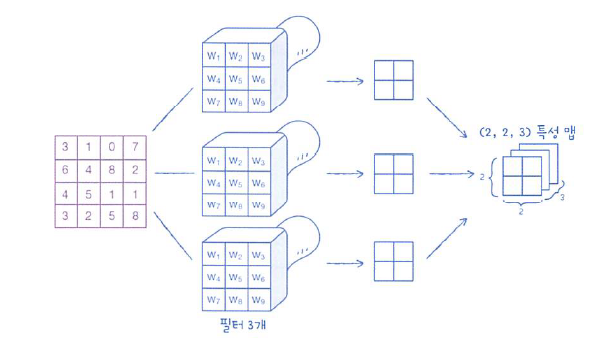

In [13]:
# from IPython.display import Image
# Image('../fig/cnn_filter_number.png')

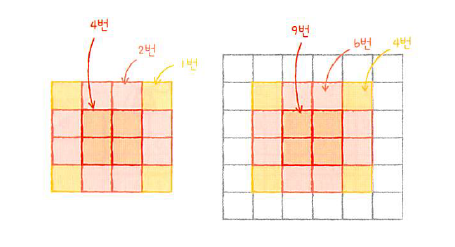

In [12]:
# from IPython.display import Image
# Image('../fig/cnn_zero_padding.png')

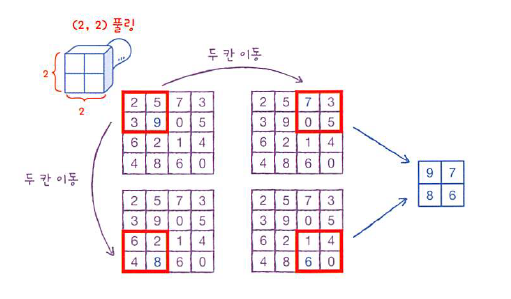

In [14]:
# from IPython.display import Image
# Image('../fig/cnn_pooling.png')

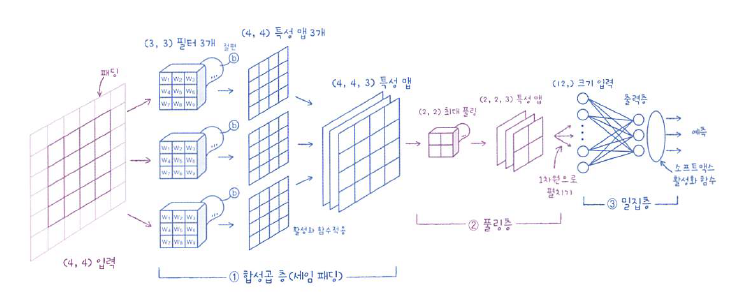

In [16]:
# from IPython.display import Image
# Image('../fig/cnn_workflow.png')

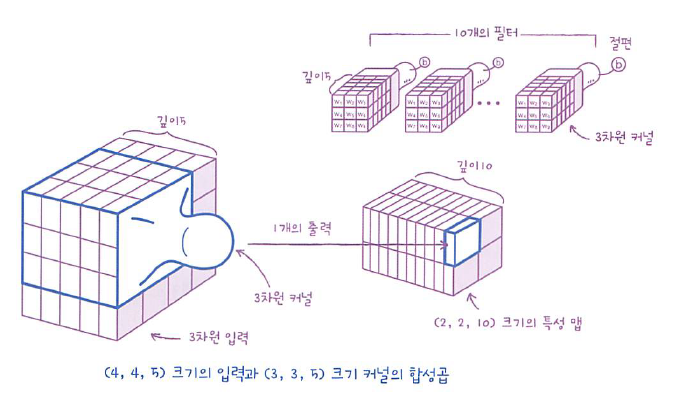

In [15]:
# from IPython.display import Image
# Image('../fig/cnn_3d_filter.png')

## CNN을 이용한 Fashion mnist 분류

In [128]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

print(train_input.shape)

(60000, 28, 28)


In [126]:
train_scaled_bv = train_input.reshape(-1, 28, 28, 1)/255.

In [127]:
print(train_scaled_bv.shape)

(60000, 28, 28, 1)


In [129]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled_bv, train_target,
                test_size = 0.2, random_state = 42)

In [130]:
print(train_scaled.shape)
train_target.shape

(48000, 28, 28, 1)


(48000,)

In [5]:
%config Completer.use_jedi = False

In [132]:
# First convolution layers
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, 
                              activation='relu', padding = 'same',
                              strides=1,
                             input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(pool_size=2))

In [133]:
# Second convolution layers
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3,
                             activation = 'relu', padding = 'same',
                             strides = 1))
model.add(keras.layers.MaxPool2D(pool_size=2))

In [134]:
## Fully connnected (Dense) layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [52]:
# ! pip install pydot
# ! pip install graphviz

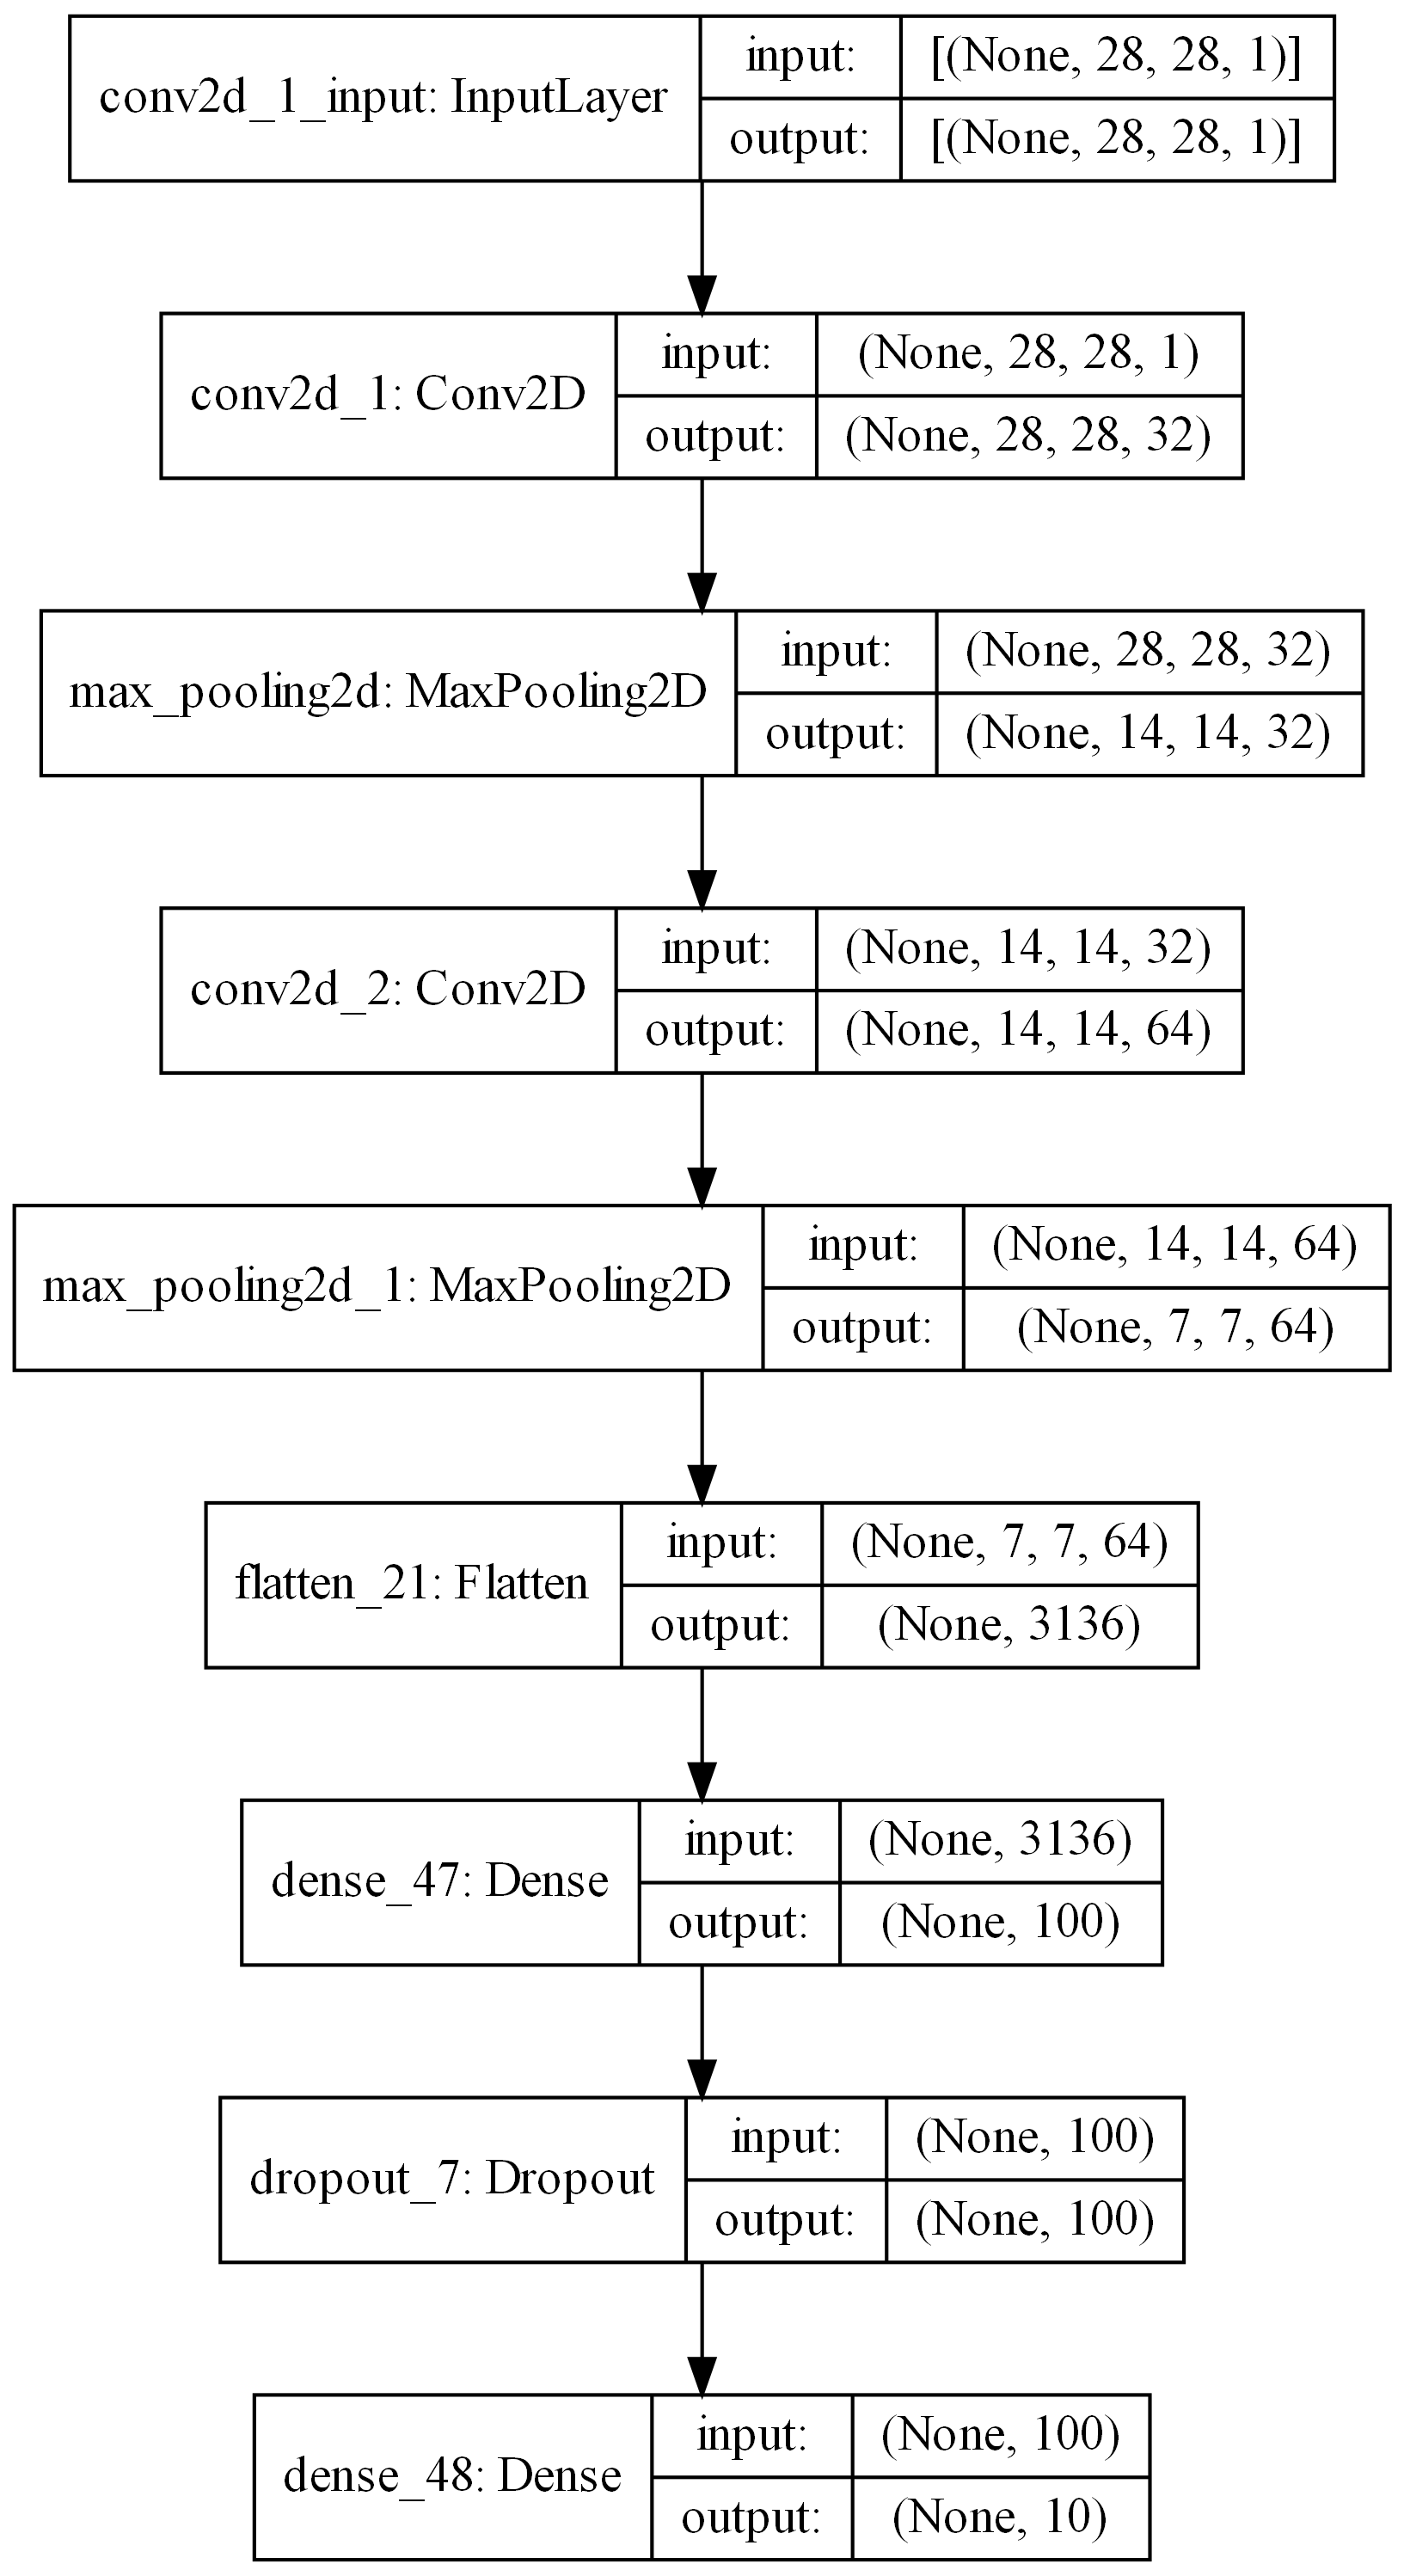

In [135]:
## plot mode
keras.utils.plot_model(model, show_shapes = True,
                      to_file = 'cnn_arch.png', dpi = 300)

In [136]:
## Training
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience  = 3)
history = model.fit(train_scaled, train_target,
                   epochs = 20, validation_data = (val_scaled, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5227 - accuracy: 0.8116 - val_loss: 0.3413 - val_accuracy: 0.8727
Epoch 2/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.3470 - accuracy: 0.8767 - val_loss: 0.2948 - val_accuracy: 0.8929
Epoch 3/20
1500/1500 [==============================] - 41s 28ms/step - loss: 0.3024 - accuracy: 0.8907 - val_loss: 0.2485 - val_accuracy: 0.9072
Epoch 4/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2700 - accuracy: 0.9028 - val_loss: 0.2378 - val_accuracy: 0.9143
Epoch 5/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2441 - accuracy: 0.9107 - val_loss: 0.2299 - val_accuracy: 0.9155
Epoch 6/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2239 - accuracy: 0.9172 - val_loss: 0.2218 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2064 - accuracy: 0.9235 - val_loss: 0.2182 -

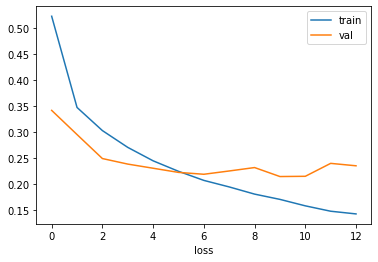

In [137]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [139]:
model.evaluate(val_scaled, val_target, verbose=0)

[0.21384024620056152, 0.9227499961853027]

In [140]:
test_input[0].shape

(28, 28)

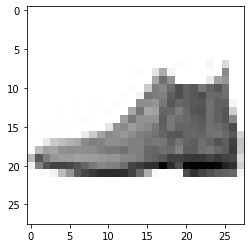

In [151]:
## 새로운 자료에 대한 prediction
# plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray')
plt.imshow((test_input[0]/255.), cmap = 'gray_r')
plt.show()

In [152]:
test_input[0].reshape(-1, 28, 28, 1).shape

(1, 28, 28, 1)

In [158]:
import numpy as np
preds = model.predict(test_input[0].reshape(-1, 28, 28, 1)/255.)
print(np.argmax(preds))
print(preds)

9
[[1.2789289e-10 2.5064939e-12 4.9333506e-12 1.5214968e-10 8.5174021e-12
  8.6641165e-08 3.7473440e-12 1.2293267e-04 4.3501328e-11 9.9987698e-01]]


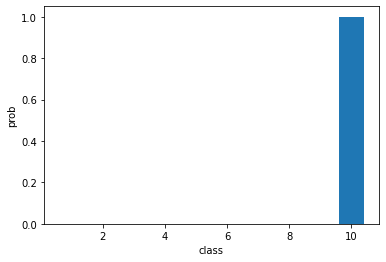

In [165]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [166]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2503 - accuracy: 0.9160


[0.2502599358558655, 0.9160000085830688]

## CNN의 시각화

In [206]:
## Load the best cnn model
from tensorflow import keras

%config Completer.use_jedi  = False

In [46]:
model = keras.models.load_model('best-cnn-model.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

### 모델 layers

In [9]:
model.layers

In [11]:
## 첫번째 layers 속성
conv = model.layers[0]

print(conv.weights[0].shape)
print(conv.bias)

(3, 3, 1, 32)
<tf.Variable 'conv2d_2/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.01040977, -0.02286652, -0.03650203, -0.07001971, -0.01476946,
       -0.06524942, -0.02768943, -0.09742133,  0.17781177, -0.18419585,
       -0.23128672, -0.01079507, -0.0134154 , -0.06503161, -0.23845957,
        0.23957044, -0.00069263, -0.06429996, -0.00476831, -0.00682838,
       -0.00679423, -0.01096875,  0.08002998, -0.01296877, -0.01576101,
       -0.00166807, -0.03028678, -0.03176277, -0.07943576,  0.02179393,
        0.04487358,  0.00427684], dtype=float32)>


tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [13]:
# Tensorflow weights 객체를 numpy 배열로 변환
conv_weights = conv.weights[0].numpy()
print(conv_weights)

[[[[-2.64430434e-01  9.53928307e-02  7.11026192e-02  6.51040375e-02
    -3.12496156e-01 -5.96699398e-03  4.61160950e-02  1.29639074e-01
     3.57772619e-01  3.83874141e-02 -1.07222982e-01 -2.03671977e-02
    -7.50891790e-02  2.14363873e-01  7.32608810e-02 -1.58851123e+00
     1.05580920e-02 -6.46974519e-02 -1.97812051e-01  6.71493113e-02
    -4.41802591e-01  6.24081418e-02 -1.48902401e-01  9.66024697e-02
     8.21578205e-02 -2.00946122e-01  2.71018166e-02  5.62664457e-02
    -2.34930813e-02 -3.51846665e-01  3.27773988e-01  3.05757403e-01]]

  [[ 2.05690801e-01 -3.69429530e-04  1.48584977e-01 -2.53688186e-01
     3.01803917e-01  1.48114651e-01  1.27610013e-01  3.32814842e-01
     1.18958279e-02 -3.14947367e-02  6.23856746e-02 -2.73665832e-03
     2.39843205e-01  2.80094445e-01  1.53051868e-01 -1.16415441e+00
    -2.94137210e-01  2.16971368e-01 -2.96767294e-01 -4.14338857e-01
     3.67826410e-02  4.09627616e-01 -1.32444990e+00 -2.86496967e-01
    -3.41756165e-01  2.59558439e-01 -1.158140

In [10]:
print(conv_weights.mean(), conv_weights.std())

-0.010274961 0.25958753


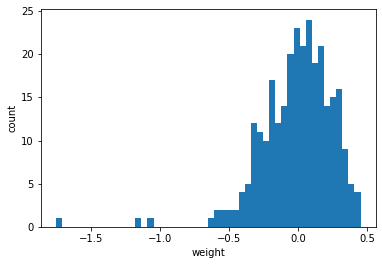

In [11]:
## Histogram of weights values
plt.hist(conv_weights.reshape(-1,1), bins = 50)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# np.shape(conv_weights.reshape(-1,1))

In [18]:
conv_weights[:,:,0,31]

array([[ 0.18978035,  0.0646541 , -0.07181791],
       [ 0.45007148, -0.26071927, -0.33713856],
       [ 0.04573868,  0.02320007, -0.05360144]], dtype=float32)

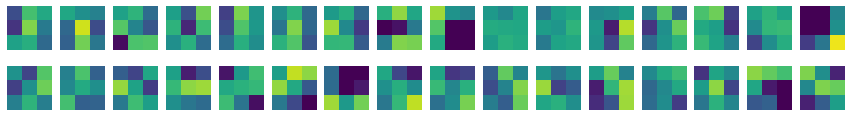

In [15]:
## Showing learned kernel

fig, axes = plt.subplots(2,16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axes[i,j].imshow(conv_weights[:,:,0,i*16+j],
                        vmin = -0.5, vmax = 0.5)
        axes[i,j].axis('off')
plt.show()

In [63]:
# %config Completer.use_jedi=False

In [16]:
## Showing initial kernel

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,
                                         kernel_size = 3,
                                         activation ='relu',
                                         padding = 'same',
                                         input_shape = (28, 28, 1)))

In [18]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [19]:
no_training_weights = no_training_conv.weights[0].numpy()
# print(no_training_weights.mean(), no_training_weights.std())

0.0009962051 0.08520077


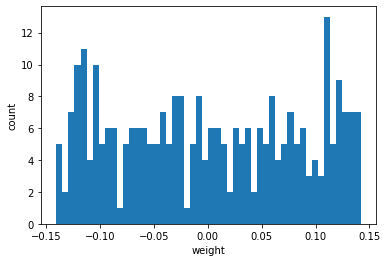

In [20]:
## Histogram of weights values
                     , bins = 50)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

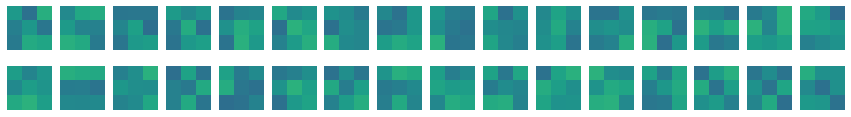

In [21]:
## Showing learned kernel

fig, axes = plt.subplots(2,16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axes[i,j].imshow(no_training_weights[:,:,0,i*16+j],
                        vmin = -0.5, vmax = 0.5)
        axes[i,j].axis('off')
plt.show()

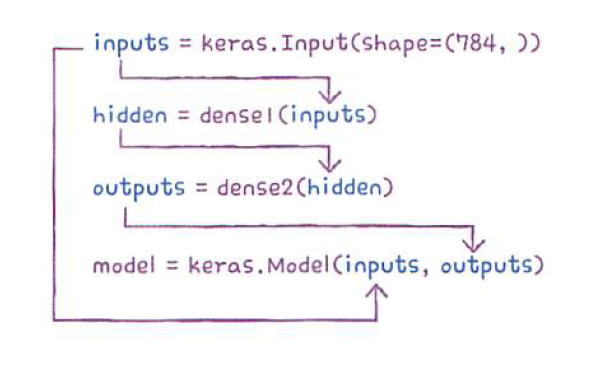

In [78]:
# from IPython.display import Image
# Image('../fig/keras_model.png')

### Model 시각화

In [52]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)
conv_acti.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


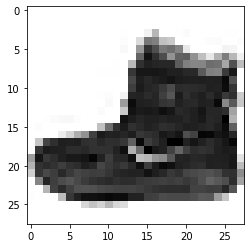

In [32]:
# numpy array type
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

# plt.figure()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [53]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

(1, 28, 28, 32)


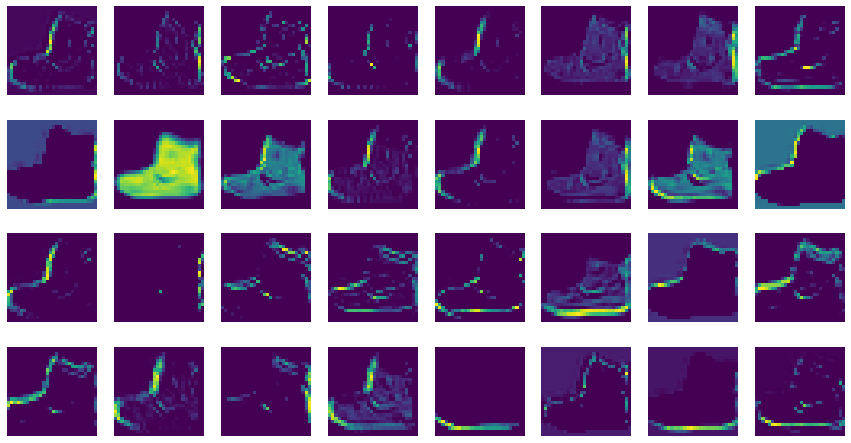

In [54]:
# plot feature maps

fig, axes = plt.subplots(4,8, figsize =(15,8))

for i in range(4):
    for j in range(8):
        axes[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axes[i, j].axis('off')
plt.show()

In [57]:
## 두 번째 layers에서 나온 feature maps
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [58]:
inputs  = train_input[0:1].reshape(-1,28,28,1)/255.0

feature_maps = conv2_acti.predict(inputs)


In [59]:
print(feature_maps.shape)

(1, 14, 14, 64)


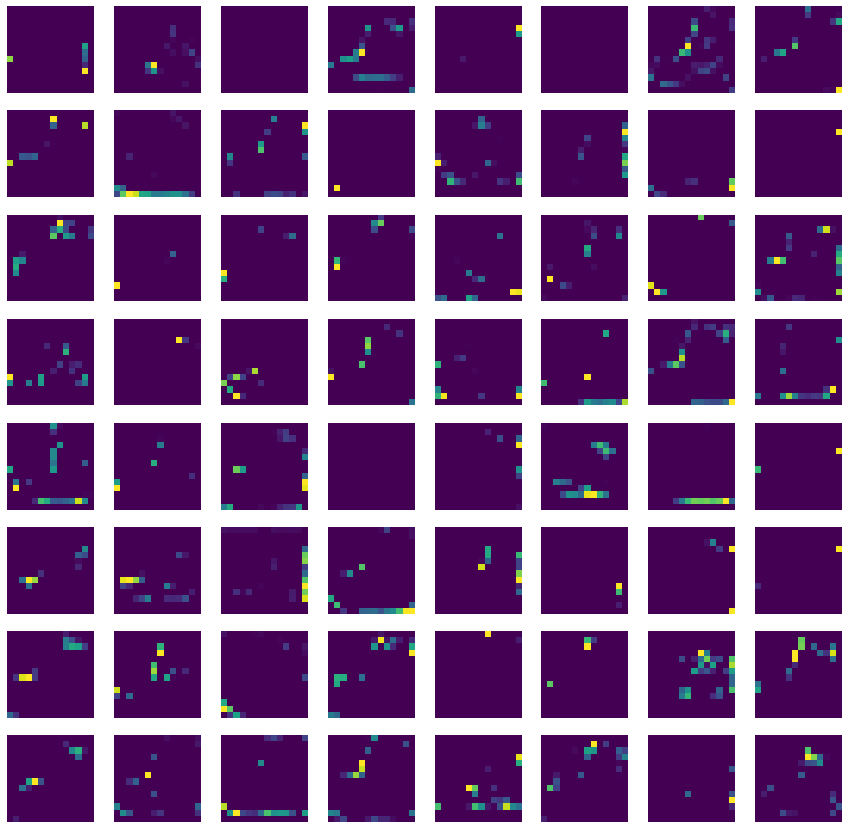

In [61]:
## plot the second layers feature maps

fig, axes = plt.subplots(8,8, figsize = (15,15))

for i in range(8):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axes[i, j].axis('off')
plt.show()